In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import glob
import os
import json
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Create dataframe from train.csv + embeddings

In [2]:
train_root = '/home/alex/Downloads/train_dataset_mincult-train'

In [3]:
df = pd.read_csv(open(os.path.join(train_root, 'train.csv')), delimiter=';')
df

,object_id,name,description,group,img_name
0,10669820,Водолей - коник (фрагмент - голова),"сероглиняный, лепной, со сплошным белым ангобо...",Археология,7862029.jpg
1,4489444,Винтовка «Самозарядная винтовка Токарева» (мет...,"На стволе имеется надульник, на торце которог...",Оружие,9461061.jpg
2,8722586,Инструмент. Калибр-скоба,Прямоугольная пластина с усечёнными углами и д...,Прочие,5095122.jpg
3,3712248,"Судомодель. НИС ""Космонавт Виктор Пацаев"".","Корпус модели, надстройки, шлюпки выполнены и...",Прочие,551422.jpg
4,6339754,Сабля.,NaN,Оружие,2592073.jpg
...,...,...,...,...,...
20340,19945381,La Sainte Bible avec des explications & reflex...,"В переплете коричневой кожи, на корешке три н...",Редкие книги,20653985.jpg
20341,10334174,Фрагмент ручки синопской амфоры с сохранившимс...,NaN,Археология,41217662.jpg
20342,4708600,Шашка кавказская.(ножны),NaN,Оружие,1766049.jpg
20343,9622688,Висмутин,Висмутин. Зёрна в кварце,Минералогия,6305416.jpg


In [4]:
train_subset = open('train_train.txt', 'r').read().strip().split('\n')
train_subset[0]

'/home/alex/Downloads/train_dataset_mincult-train/train/10005608/6881713.jpg'

In [5]:
df_train = pd.DataFrame([x.split('/')[-2:] for x in train_subset], columns=('object_id', 'img_name'))
df_train

,object_id,img_name
0,10005608,6881713.jpg
1,10007437,6884363.jpg
2,10008800,6885950.jpg
3,10008802,6885952.jpg
4,10008803,6885953.jpg
...,...,...
14995,43817263,53915443.jpg
14996,43817301,53915494.jpg
14997,43817301,53915495.jpg
14998,43817337,53915574.jpg


In [6]:
df_train['group'] = df_train.apply(lambda x: df[(df['object_id'] == int(x['object_id'])) & (df['img_name'] == x['img_name'])]['group'].iloc[0], axis=1)
df_train

,object_id,img_name,group
0,10005608,6881713.jpg,Нумизматика
1,10007437,6884363.jpg,"Фото, негативы"
2,10008800,6885950.jpg,"Фото, негативы"
3,10008802,6885952.jpg,"Фото, негативы"
4,10008803,6885953.jpg,"Фото, негативы"
...,...,...,...
14995,43817263,53915443.jpg,"Фото, негативы"
14996,43817301,53915494.jpg,"Фото, негативы"
14997,43817301,53915495.jpg,"Фото, негативы"
14998,43817337,53915574.jpg,"Фото, негативы"


In [7]:
df_train['embedding'] = df_train.apply(lambda x: tuple(json.load(open(os.path.join(train_root, 
                                                                'train', 
                                                                str(x['object_id']), 
                                                                str(x['img_name'])) + '.txt', 
                                                   'r'))),
                           axis=1).apply(np.array)
df_train

,object_id,img_name,group,embedding
0,10005608,6881713.jpg,Нумизматика,"[0.53369140625, 0.44873046875, 1.1708984375, 0..."
1,10007437,6884363.jpg,"Фото, негативы","[0.0738525390625, -0.1143798828125, -1.0009765..."
2,10008800,6885950.jpg,"Фото, негативы","[0.2440185546875, -0.354248046875, -0.59716796..."
3,10008802,6885952.jpg,"Фото, негативы","[0.67626953125, 0.020355224609375, -0.49365234..."
4,10008803,6885953.jpg,"Фото, негативы","[0.9990234375, -0.044158935546875, -0.29614257..."
...,...,...,...,...
14995,43817263,53915443.jpg,"Фото, негативы","[0.10955810546875, 0.07403564453125, 0.0226440..."
14996,43817301,53915494.jpg,"Фото, негативы","[0.2188720703125, 0.2152099609375, 0.371826171..."
14997,43817301,53915495.jpg,"Фото, негативы","[0.177490234375, -0.26953125, 0.22802734375, -..."
14998,43817337,53915574.jpg,"Фото, негативы","[-0.466552734375, -0.1690673828125, 0.12780761..."


# Read test search results

In [8]:
test_root = train_root

In [9]:
test_subset = open('train_test.txt', 'r').read().strip().split('\n')
test_subset[0]

'/home/alex/Downloads/train_dataset_mincult-train/train/43817341/53915579.jpg'

In [10]:
df_test = pd.DataFrame([x.split('/')[-2:] for x in test_subset], columns=('object_id', 'img_name'))
df_test

,object_id,img_name
0,43817341,53915579.jpg
1,43817348,53915587.jpg
2,43817368,53915606.jpg
3,43817371,53915608.jpg
4,43817372,53915609.jpg
...,...,...
5337,9993000,6864664.jpg
5338,9993000,6864663.jpg
5339,9993006,6864675.jpg
5340,9994312,6866451.jpg


In [11]:
df_test['group_gt'] = df_test.apply(lambda x: df[(df['object_id'] == int(x['object_id'])) & (df['img_name'] == x['img_name'])]['group'].iloc[0], axis=1)
df_test

,object_id,img_name,group_gt
0,43817341,53915579.jpg,"Фото, негативы"
1,43817348,53915587.jpg,"Фото, негативы"
2,43817368,53915606.jpg,"Фото, негативы"
3,43817371,53915608.jpg,"Фото, негативы"
4,43817372,53915609.jpg,"Фото, негативы"
...,...,...,...
5337,9993000,6864664.jpg,Естественнонауч.коллекция
5338,9993000,6864663.jpg,Естественнонауч.коллекция
5339,9993006,6864675.jpg,Естественнонауч.коллекция
5340,9994312,6866451.jpg,Естественнонауч.коллекция


In [12]:
embs = np.vstack(df_train['embedding']).T

In [13]:
def find_group(x):
    try:
        emb = np.array(json.load(open(os.path.join(test_root, 'train', str(x['object_id']), str(x['img_name'])) + '.txt', 'r'))['data'][0]['matches'][0]['embedding'])
        emb = np.reshape(emb, (1, -1))
        similarity = emb @ embs
        idx = np.argmax(similarity)
        group = df_train['group'].iloc[idx]
        return group
    except:
        print(str(x))
        return None

In [14]:
df_test['group'] = df_test.apply(lambda x: find_group(x), 
                                 axis=1)
df_test

,object_id,img_name,group_gt,group
0,43817341,53915579.jpg,"Фото, негативы","Фото, негативы"
1,43817348,53915587.jpg,"Фото, негативы","Фото, негативы"
2,43817368,53915606.jpg,"Фото, негативы","Фото, негативы"
3,43817371,53915608.jpg,"Фото, негативы","Фото, негативы"
4,43817372,53915609.jpg,"Фото, негативы",Прочие
...,...,...,...,...
5337,9993000,6864664.jpg,Естественнонауч.коллекция,Естественнонауч.коллекция
5338,9993000,6864663.jpg,Естественнонауч.коллекция,Минералогия
5339,9993006,6864675.jpg,Естественнонауч.коллекция,Естественнонауч.коллекция
5340,9994312,6866451.jpg,Естественнонауч.коллекция,Естественнонауч.коллекция


In [15]:
df_test.to_csv(os.path.join(test_root, 'train_test_dober.csv'), sep = ';', encoding = 'utf-8', index = False)

In [16]:
df_test.group.value_counts()

group
Оружие                       678
Фото, негативы               481
ДПИ                          428
Редкие книги                 384
Минералогия                  378
Скульптура                   364
Живопись                     346
Естественнонауч.коллекция    340
Документы                    320
Археология                   318
Прочие                       305
Печатная продукция           304
Техника                      256
Графика                      252
Нумизматика                  188
Name: count, dtype: int64

In [17]:
df_test.group_gt.value_counts()

group_gt
Оружие                       674
Фото, негативы               654
Документы                    432
Скульптура                   404
Естественнонауч.коллекция    395
Живопись                     387
Прочие                       356
Техника                      348
Минералогия                  331
ДПИ                          317
Редкие книги                 306
Археология                   273
Графика                      226
Нумизматика                  127
Печатная продукция           112
Name: count, dtype: int64

In [18]:
cls_names = df_test.group.unique()
cls_names

array(['Фото, негативы', 'Прочие', 'Печатная продукция', 'Редкие книги',
       'Графика', 'Документы', 'Скульптура', 'Техника', 'Нумизматика',
       'ДПИ', 'Оружие', 'Живопись', 'Минералогия',
       'Естественнонауч.коллекция', 'Археология'], dtype=object)

In [19]:
cls_dics = {x: idx for idx, x in enumerate(cls_names)}
cls_dics

{'Фото, негативы': 0,
 'Прочие': 1,
 'Печатная продукция': 2,
 'Редкие книги': 3,
 'Графика': 4,
 'Документы': 5,
 'Скульптура': 6,
 'Техника': 7,
 'Нумизматика': 8,
 'ДПИ': 9,
 'Оружие': 10,
 'Живопись': 11,
 'Минералогия': 12,
 'Естественнонауч.коллекция': 13,
 'Археология': 14}

In [20]:
df_test['group_nums'] = df_test.apply(lambda x: cls_dics[x['group']], axis=1)
df_test['group_gt_nums'] = df_test.apply(lambda x: cls_dics[x['group_gt']], axis=1)
df_test

,object_id,img_name,group_gt,group,group_nums,group_gt_nums
0,43817341,53915579.jpg,"Фото, негативы","Фото, негативы",0,0
1,43817348,53915587.jpg,"Фото, негативы","Фото, негативы",0,0
2,43817368,53915606.jpg,"Фото, негативы","Фото, негативы",0,0
3,43817371,53915608.jpg,"Фото, негативы","Фото, негативы",0,0
4,43817372,53915609.jpg,"Фото, негативы",Прочие,1,0
...,...,...,...,...,...,...
5337,9993000,6864664.jpg,Естественнонауч.коллекция,Естественнонауч.коллекция,13,13
5338,9993000,6864663.jpg,Естественнонауч.коллекция,Минералогия,12,13
5339,9993006,6864675.jpg,Естественнонауч.коллекция,Естественнонауч.коллекция,13,13
5340,9994312,6866451.jpg,Естественнонауч.коллекция,Естественнонауч.коллекция,13,13


In [21]:
confusion_matrix(df_test.group_gt_nums, df_test.group_nums)

array([[439,  50,  59,  25,   5,  44,   5,  14,   6,   3,   0,   4,   0,
          0,   0],
       [  3,  71,  17,   6,   1,  16,  20,  51,  27,  70,  58,   0,   8,
          1,   7],
       [  2,   0,  66,  24,   4,  12,   0,   0,   3,   0,   0,   0,   0,
          1,   0],
       [  0,   1,  21, 276,   1,   3,   0,   0,   1,   0,   0,   3,   0,
          0,   0],
       [  1,  11,  10,   2, 189,   6,   2,   0,   1,   1,   0,   3,   0,
          0,   0],
       [ 32,  27, 107,  25,   1, 235,   1,   1,   3,   0,   0,   0,   0,
          0,   0],
       [  3,  28,  16,   2,   1,   0, 315,   2,   4,  15,   2,   2,   7,
          1,   6],
       [  0,  39,   1,   8,   0,   2,   0, 152,  20,  50,  41,   1,  15,
          2,  17],
       [  0,   8,   4,   0,   0,   0,   0,   0, 114,   1,   0,   0,   0,
          0,   0],
       [  0,  14,   2,   6,  11,   2,   3,  12,   2, 244,  16,   1,   1,
          0,   3],
       [  0,  22,   0,   4,   0,   0,   6,  23,   4,  30, 556,   2,   5,
       

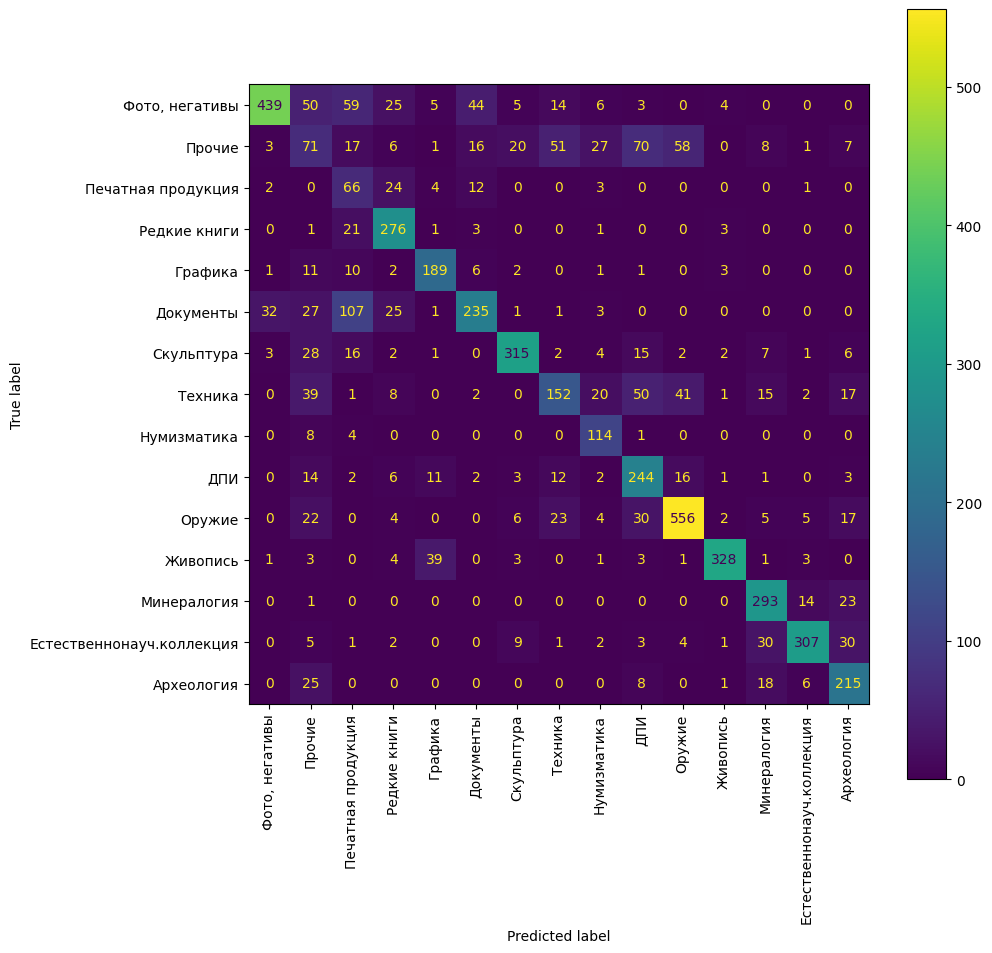

In [22]:
cm = confusion_matrix(df_test.group_gt_nums, df_test.group_nums)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, xticks_rotation='vertical')

In [23]:
print(pd.crosstab(df_test.group_gt, df_test.group))

group                      Археология  Графика  ДПИ  Документы  \
group_gt                                                         
Археология                        215        0    8          0   
Графика                             0      189    1          6   
ДПИ                                 3       11  244          2   
Документы                           0        1    0        235   
Естественнонауч.коллекция          30        0    3          0   
Живопись                            0       39    3          0   
Минералогия                        23        0    0          0   
Нумизматика                         0        0    1          0   
Оружие                             17        0   30          0   
Печатная продукция                  0        4    0         12   
Прочие                              7        1   70         16   
Редкие книги                        0        1    0          3   
Скульптура                          6        1   15          0   
Техника   

In [24]:
print(f1_score(df_test.group_gt, df_test.group, average='macro'))
print(f1_score(df_test.group_gt, df_test.group, average='micro'))
print(f1_score(df_test.group_gt, df_test.group, average='weighted'))
print(f1_score(df_test.group_gt, df_test.group, average=None))

0.6887248009134984
0.711344065892924
0.7151738135581812
[0.72758037 0.79079498 0.65503356 0.625      0.83537415 0.89495225
 0.82651622 0.72380952 0.82248521 0.31730769 0.21482602 0.8
 0.8203125  0.50331126 0.77356828]


In [25]:
print(precision_recall_fscore_support(df_test.group_gt_nums, df_test.group_nums, average='macro'))
print(precision_recall_fscore_support(df_test.group_gt_nums, df_test.group_nums, average='micro'))
print(precision_recall_fscore_support(df_test.group_gt_nums, df_test.group_nums, average='weighted'))
print(precision_recall_fscore_support(df_test.group_gt_nums, df_test.group_nums, average=None))

(0.6882346712889464, 0.7165646694398955, 0.6887248009134983, None)
(0.711344065892924, 0.711344065892924, 0.711344065892924, None)
(0.7379507443100667, 0.711344065892924, 0.7151738135581812, None)
(array([0.91268191, 0.23278689, 0.21710526, 0.71875   , 0.75      ,
       0.734375  , 0.86538462, 0.59375   , 0.60638298, 0.57009346,
       0.820059  , 0.94797688, 0.77513228, 0.90294118, 0.67610063]), array([0.67125382, 0.1994382 , 0.58928571, 0.90196078, 0.83628319,
       0.54398148, 0.77970297, 0.43678161, 0.8976378 , 0.76971609,
       0.82492582, 0.84754522, 0.88519637, 0.77721519, 0.78754579]), array([0.77356828, 0.21482602, 0.31730769, 0.8       , 0.79079498,
       0.625     , 0.8203125 , 0.50331126, 0.72380952, 0.65503356,
       0.82248521, 0.89495225, 0.82651622, 0.83537415, 0.72758037]), array([654, 356, 112, 306, 226, 432, 404, 348, 127, 317, 674, 387, 331,
       395, 273]))


In [26]:
accuracy_score(df_test.group_gt_nums, df_test.group_nums)

0.711344065892924